In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [2]:
df=pd.read_csv(r"C:/Users/chriq/OneDrive/Documents/my_data/Textminingdata/text_financial/testimony_spy.csv", parse_dates=['date'])

In [3]:
df['contents'] = df['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())
df

,Unnamed: 0,date,contents,speaker,title,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+5,SPY: d+6,SPY: d+7,SPY: d+8,SPY: d+9,SPY: d+10,SPY: d+11,SPY: d+12,SPY: d+13,SPY: d+14
0,0,1996-06-26,It is a pleasure to appear before this Subcomm...,"Governor Edward W. Kelley, Jr.",Supervision of bank sales practices,25.864319,26.137705,26.247076,26.228842,26.228842,...,26.083029,26.210615,26.010128,25.353931,25.335707,25.317488,25.408623,25.499762,25.481527,25.809631
1,1,1996-07-17,I am pleased to appear before the Committee on...,"Herbert A. Biern, Deputy Associate Director, D...","""Prime bank"" schemes",26.242840,26.297781,26.297781,26.462601,26.316103,...,26.499220,26.480902,26.389343,25.839956,25.968130,25.894896,25.986469,25.949833,26.316103,26.371027
2,2,1996-07-18,Testimony of Chairman Alan Greenspan The Feder...,Chairman Alan Greenspan,The Federal Reserve's semiannual monetary report,25.876574,25.858263,26.389343,26.462601,26.224524,...,26.389343,26.718983,26.627411,26.499220,26.755627,26.718983,26.627411,26.535849,26.444286,26.206215
3,3,1996-07-24,I am pleased to appear before this Subcommitte...,Governor Janet L. Yellen,Trends in consumer lending,26.096848,26.170630,26.465719,26.539494,26.521049,...,26.594809,26.484146,26.410383,26.391937,26.465719,26.447269,26.262844,26.391937,26.539494,26.521049
4,4,1996-07-26,I appreciate this opportunity to appear before...,Chairman Alan Greenspan,Recent reports on Federal Reserve operations,26.779249,26.871473,27.019001,27.019001,27.037451,...,27.277197,27.295652,27.314091,27.295652,27.406319,27.480087,27.443205,27.350975,27.369415,27.184986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,449,2021-09-28,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Coronavirus and CARES Act,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,450,2021-11-30,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Coronavirus and CARES Act,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,451,2022-01-11,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Nomination hearing,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,452,2022-01-13,"The Federal Reserve, the central bank of the U...",Governor Lael Brainard,Nomination hearing,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.contents.iloc[0])

It is a pleasure to appear before this Subcommittee to discuss         the supervision of bank sales practices on behalf of the Federal         Reserve.  The recent publication of various survey results has         focused attention on the performance of the banking and         securities industries in educating customers about the critical         differences between FDIC-insured deposits and uninsured         investment products sold on bank premises.The Board has a long history of concerns about possible         customer confusion between insured deposit instruments and         uninsured investment products sold on bank premises.  We have         worked and continue to work diligently to minimize customer         confusion through a number of supervisory and educational         initiatives.  These initiatives include coordination among the         banking agencies to formulate clear and comprehensive guidelines         governing the conduct of sales programs for nondeposit investmen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  454 non-null    int64         
 1   date        454 non-null    datetime64[ns]
 2   contents    454 non-null    object        
 3   speaker     454 non-null    object        
 4   title       454 non-null    object        
 5   SPY: d-1    223 non-null    float64       
 6   SPY: d+0    223 non-null    float64       
 7   SPY: d+1    223 non-null    float64       
 8   SPY: d+2    223 non-null    float64       
 9   SPY: d+3    223 non-null    float64       
 10  SPY: d+4    223 non-null    float64       
 11  SPY: d+5    223 non-null    float64       
 12  SPY: d+6    223 non-null    float64       
 13  SPY: d+7    223 non-null    float64       
 14  SPY: d+8    223 non-null    float64       
 15  SPY: d+9    223 non-null    float64       
 16  SPY: d+10   223 non-null  

# Preprocessing

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chriq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
stemmer = SnowballStemmer('english')

In [8]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
processed_docs = df['contents'].map(preprocess)
processed_docs

0      [pleasur, appear, subcommitte, discuss, superv...
1      [pleas, appear, committe, bank, hous, urban, a...
2      [testimoni, chairman, alan, greenspan, feder, ...
3      [pleas, appear, subcommitte, today, discuss, t...
4      [appreci, opportun, appear, bank, committe, to...
                             ...                        
449    [feder, reserv, central, bank, unit, state, pr...
450    [feder, reserv, central, bank, unit, state, pr...
451    [feder, reserv, central, bank, unit, state, pr...
452    [feder, reserv, central, bank, unit, state, pr...
453    [feder, reserv, central, bank, unit, state, pr...
Name: contents, Length: 454, dtype: object

In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abil
1 abl
2 access
3 account
4 achiev
5 action
6 activ
7 addit
8 address
9 adequaci
10 advertis


In [11]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[43]

[(0, 2),
 (2, 1),
 (5, 7),
 (20, 2),
 (21, 1),
 (23, 1),
 (29, 18),
 (30, 1),
 (35, 2),
 (36, 5),
 (45, 1),
 (46, 1),
 (47, 5),
 (50, 1),
 (53, 2),
 (59, 4),
 (67, 6),
 (68, 7),
 (71, 3),
 (75, 1),
 (80, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (86, 2),
 (91, 3),
 (95, 1),
 (99, 3),
 (103, 1),
 (104, 1),
 (106, 4),
 (107, 1),
 (112, 5),
 (117, 6),
 (121, 1),
 (133, 1),
 (136, 2),
 (140, 1),
 (142, 1),
 (156, 6),
 (161, 2),
 (169, 2),
 (170, 2),
 (173, 2),
 (175, 3),
 (177, 1),
 (178, 1),
 (179, 1),
 (182, 1),
 (185, 1),
 (186, 1),
 (189, 3),
 (192, 3),
 (196, 2),
 (197, 1),
 (200, 4),
 (201, 4),
 (204, 1),
 (206, 2),
 (207, 1),
 (208, 1),
 (213, 2),
 (233, 1),
 (238, 4),
 (241, 1),
 (242, 1),
 (249, 7),
 (250, 2),
 (262, 3),
 (264, 1),
 (274, 1),
 (284, 2),
 (285, 6),
 (295, 2),
 (300, 1),
 (304, 3),
 (306, 6),
 (310, 1),
 (311, 2),
 (317, 2),
 (318, 5),
 (319, 2),
 (330, 1),
 (331, 1),
 (332, 1),
 (339, 1),
 (343, 1),
 (352, 1),
 (363, 3),
 (368, 1),
 (371, 2),
 (374, 1),
 (377, 2),
 (378, 

In [13]:
bow_doc_43 = bow_corpus[43]

for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
                                                     dictionary[bow_doc_43[i][0]], 
                                                     bow_doc_43[i][1]))

Word 0 ("abl") appears 2 time.
Word 2 ("advertis") appears 1 time.
Word 5 ("affili") appears 7 time.
Word 20 ("avoid") appears 2 time.
Word 21 ("awar") appears 1 time.
Word 23 ("behalf") appears 1 time.
Word 29 ("burden") appears 18 time.
Word 30 ("call") appears 1 time.
Word 35 ("comment") appears 2 time.
Word 36 ("commerci") appears 5 time.
Word 45 ("compli") appears 1 time.
Word 46 ("complianc") appears 1 time.
Word 47 ("comprehens") appears 5 time.
Word 50 ("confus") appears 1 time.
Word 53 ("contain") appears 2 time.
Word 59 ("custom") appears 4 time.
Word 67 ("deposit") appears 6 time.
Word 68 ("depositori") appears 7 time.
Word 71 ("disclosur") appears 3 time.
Word 75 ("employ") appears 1 time.
Word 80 ("engag") appears 1 time.
Word 82 ("entiti") appears 1 time.
Word 83 ("equiti") appears 1 time.
Word 84 ("especi") appears 1 time.
Word 86 ("examin") appears 2 time.
Word 91 ("extend") appears 3 time.
Word 95 ("fdic") appears 1 time.
Word 99 ("file") appears 3 time.
Word 103 ("fre

In [14]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.007451716464313942),
 (1, 0.0185206217120598),
 (2, 0.027608094534232925),
 (3, 0.03264346704732357),
 (4, 0.04579787211419987),
 (5, 0.08801406120145007),
 (6, 0.0156649700256126),
 (7, 0.024797765660561487),
 (8, 0.018117207113166556),
 (9, 0.009688639711241344),
 (10, 0.014034983115640881),
 (11, 0.013103125756070304),
 (12, 0.03955330945839657),
 (13, 0.013859153982957903),
 (14, 0.01326639511728643),
 (15, 0.027372560204132076),
 (16, 0.012248723173831084),
 (17, 0.0639259189212565),
 (18, 0.024005998569045714),
 (19, 0.012027515642009217),
 (20, 0.018467893455601216),
 (21, 0.024797765660561487),
 (22, 0.21153291941448948),
 (23, 0.020645805010146505),
 (24, 0.02529616052187801),
 (25, 0.029065919133724034),
 (26, 0.03967096859465831),
 (27, 0.009983380616731184),
 (28, 0.1813679460182761),
 (29, 0.012323528985651016),
 (30, 0.010536181007262406),
 (31, 0.01394669284145),
 (32, 0.010791740831346045),
 (33, 0.03507490381679157),
 (34, 0.012551267155018128),
 (35, 0.03031104

# LDA using bag of words

In [15]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [16]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"mortgag" + 0.009*"budget" + 0.008*"spend" + 0.006*"propos" + 0.006*"equiti" + 0.006*"debt" + 0.005*"fiscal" + 0.005*"deriv" + 0.004*"project" + 0.004*"incom"
Topic: 1 
Words: 0.021*"inflat" + 0.011*"labor" + 0.008*"employ" + 0.007*"longer" + 0.007*"pace" + 0.007*"spend" + 0.006*"fomc" + 0.006*"outlook" + 0.006*"household" + 0.006*"unemploy"
Topic: 2 
Words: 0.020*"small" + 0.017*"educ" + 0.008*"survey" + 0.008*"disclosur" + 0.007*"deposit" + 0.006*"lend" + 0.006*"depositori" + 0.004*"offer" + 0.004*"propos" + 0.004*"student"
Topic: 3 
Words: 0.022*"mortgag" + 0.012*"disclosur" + 0.012*"card" + 0.010*"lend" + 0.008*"borrow" + 0.008*"foreclosur" + 0.008*"creditor" + 0.007*"propos" + 0.007*"score" + 0.007*"examin"
Topic: 4 
Words: 0.014*"deposit" + 0.013*"currenc" + 0.007*"premium" + 0.007*"depositori" + 0.006*"fdic" + 0.006*"dollar" + 0.005*"propos" + 0.005*"treasuri" + 0.005*"lend" + 0.005*"small"
Topic: 5 
Words: 0.011*"deposit" + 0.010*"depositori" + 0.010*"pro

# LDA using TF-IDF

In [17]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [18]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"budget" + 0.008*"social" + 0.007*"retir" + 0.006*"fiscal" + 0.005*"surplus" + 0.004*"deficit" + 0.004*"medicar" + 0.004*"launder" + 0.004*"inflat" + 0.004*"spend"
Topic: 1 Word: 0.006*"basel" + 0.005*"dodd" + 0.005*"supervisori" + 0.005*"frank" + 0.005*"examin" + 0.004*"mortgag" + 0.004*"lend" + 0.004*"crisi" + 0.004*"communiti" + 0.004*"guidanc"
Topic: 2 Word: 0.006*"inflat" + 0.004*"fomc" + 0.003*"energi" + 0.003*"municip" + 0.003*"mortgag" + 0.003*"outlook" + 0.002*"labor" + 0.002*"nomin" + 0.002*"fiscal" + 0.002*"investor"
Topic: 3 Word: 0.005*"foreclosur" + 0.004*"mortgag" + 0.004*"text" + 0.003*"currenc" + 0.003*"lehman" + 0.003*"card" + 0.003*"releas" + 0.002*"examin" + 0.002*"fraud" + 0.002*"inflat"
Topic: 4 Word: 0.009*"facil" + 0.006*"pandem" + 0.004*"deriv" + 0.004*"municip" + 0.004*"bond" + 0.003*"treasuri" + 0.003*"launder" + 0.003*"section" + 0.003*"inflat" + 0.003*"dealer"
Topic: 5 Word: 0.004*"mortgag" + 0.004*"card" + 0.003*"deposit" + 0.003*"chec

# Doc2vec

In [19]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df.contents))

In [20]:
#session crashed when i ran this, even when I had a GPU connected it didnt seem to use the GPU
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [21]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

In [22]:
train_vecs_dm

array([[ 0.01633773,  0.00626559,  0.00413341, ..., -0.7398412 ,
        -0.45698535,  0.4397793 ],
       [-0.22304021,  0.33170024, -1.1658928 , ..., -1.3651189 ,
         1.2025217 ,  0.30122232],
       [-0.93276244, -0.21622342,  0.5874405 , ..., -0.1787774 ,
        -0.3316883 , -1.0099819 ],
       ...,
       [ 0.23698802, -0.4411223 , -0.09060824, ...,  0.10620764,
         0.8015562 ,  0.23009028],
       [-0.46020544, -0.99598724,  0.2212178 , ..., -0.65798295,
         0.5833799 ,  0.6135566 ],
       [-0.07919624, -0.01757155,  0.72310483, ...,  0.00984415,
         0.35641003,  0.6754618 ]], dtype=float32)

# Predictions on SPY changes


In [23]:
def pct_change_from_day_0(announcement):
    pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
    if pct_change>0:
        return 'up'
    else:
        return 'down'

In [24]:
pct_change_from_day_0(df.iloc[141])

'up'

In [25]:
df['+7change']=df.apply(pct_change_from_day_0,axis=1)

In [26]:
df.iloc[141]

Unnamed: 0                                                  141
date                                        2002-05-22 00:00:00
contents      Thank you, Mr. Chairman, for the opportunity t...
speaker                                  Governor Mark W. Olson
title         The European Union's Financial Services Action...
SPY: d-1                                              82.560066
SPY: d+0                                              82.773079
SPY: d+1                                              84.295692
SPY: d+2                                              84.516586
SPY: d+3                                              86.441551
SPY: d+4                                              86.457344
SPY: d+5                                              86.899109
SPY: d+6                                              86.015572
SPY: d+7                                              86.480988
SPY: d+8                                              87.735367
SPY: d+9                                

In [27]:
df['+7change'].value_counts()

down    317
up      137
Name: +7change, dtype: int64

In [28]:
labels=df['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [29]:
labels_onehot[:10]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

408 46 408 46


In [31]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

367 41 367 41


In [32]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30
4/4 [==============================] - 3s 399ms/step - loss: 0.2807 - accuracy: 0.5204 - val_loss: 0.2451 - val_accuracy: 0.7561
Epoch 2/30
4/4 [==============================] - 1s 260ms/step - loss: 0.2664 - accuracy: 0.5613 - val_loss: 0.2408 - val_accuracy: 0.7561
Epoch 3/30
4/4 [==============================] - 1s 260ms/step - loss: 0.2566 - accuracy: 0.5831 - val_loss: 0.2375 - val_accuracy: 0.7561
Epoch 4/30
4/4 [==============================] - 1s 254ms/step - loss: 0.2503 - accuracy: 0.6158 - val_loss: 0.2348 - val_accuracy: 0.7561
Epoch 5/30
4/4 [==============================] - 1s 267ms/step - loss: 0.2572 - accuracy: 0.5995 - val_loss: 0.2331 - val_accuracy: 0.7561
Epoch 6/30
4/4 [==============================] - 1s 278ms/step - loss: 0.2482 - accuracy: 0.6240 - val_loss: 0.2314 - val_accuracy: 0.7561
Epoch 7/30
4/4 [==============================] - 1s 251ms/step - loss: 0.2391 - accuracy: 0.6213 - val_loss: 0.2297 - val_accuracy: 0.7561
Epoch 8/30
4/4 [====

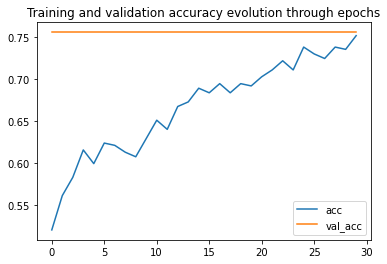

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

In [34]:
model.evaluate(X_train,y_train)

13/13 [==============================] - 0s 24ms/step - loss: 0.2147 - accuracy: 0.7010


[0.21465633809566498, 0.7009803652763367]

In [35]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 17ms/step - loss: 0.2197 - accuracy: 0.6739


[0.21968010067939758, 0.6739130616188049]